This is an experiment to ensure that the effect of the best and worst chromosomes in our studies are actually causing the differences in perfromance and are not due to randomness in the model

In [13]:
from essl.fitness import fitness_function
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
exp_dir = "/home/noah/ESSL/experiments/bootstrap_test"

In [4]:
best_chromo = [["Brightness",0.308851],
        ["Solarize",1.0],
        ["TranslateX",14.0]]

worst_chromo = [["Rotate",19.0],
        ["TranslateX", 11.0],
        ["Contrast", 0.955471]]

best_outcomes = []
worst_outcomes = []
for seed in range(5):
    fitness = fitness_function(dataset="Cifar10",
                                 backbone="largerCNN_backbone",
                                 ssl_task="BYOL",
                                 ssl_epochs=10,
                                 ssl_batch_size=64,
                                 evaluate_downstream_method="finetune",
                                 device="cuda",
                                 seed=seed)
    best_outcomes.append(list(fitness(best_chromo, return_losses=True)))
    worst_outcomes.append(list(fitness(worst_chromo, return_losses=True)))

best_outcome_df = pd.DataFrame(best_outcomes, columns = ["ssl_losses", "train_losses", "train_accs", "val_losses", "val_accs", "test_acc", "test_loss"])
worst_outcome_df = pd.DataFrame(worst_outcomes, columns = ["ssl_losses", "train_losses", "train_accs", "val_losses", "val_accs", "test_acc", "test_loss"])

best_outcome_df.to_csv(os.path.join(exp_dir, "best.csv"))
worst_outcome_df.to_csv(os.path.join(exp_dir, "worst.csv"))

Using downloaded and verified file: datasets/cifar10/cifar-10-python.tar.gz
Extracting datasets/cifar10/cifar-10-python.tar.gz to datasets/cifar10
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
time to eval:  518.5845170021057
time to eval:  514.2261345386505
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
time to eval:  485.5500876903534
time to eval:  483.9099004268646
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
time to eval:  483.07410049438477
time to eval:  484.07226037979126
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
time to eval:  484.42905712127686
time to eval:  491.6730992794037
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
time to eval:  4

In [5]:
best_outcome_df

,ssl_losses,train_losses,train_accs,val_losses,val_accs,test_acc,test_loss
0,"[-0.9140123737449477, -0.9836616794675321, -0....","[1.4159341316839402, 0.9814384924015477, 0.802...","[48.478, 65.492, 72.508, 75.868, 78.134, 79.44...","[1.0694898121273175, 0.8634208100862777, 0.746...","[61.99, 70.83, 74.8, 76.98, 78.23, 79.21, 80.1...",82.48,0.513889
1,"[-0.9165278486859784, -0.9849644348349675, -0....","[1.4366732649372753, 0.9923091944685708, 0.813...","[47.48888888888889, 65.1, 71.59333333333333, 7...","[1.115243888964319, 0.8870621158438883, 0.7610...","[60.9, 68.96, 73.28, 75.16, 77.2, 78.58, 77.14...",82.38,0.530670
2,"[-0.9128250845453956, -0.9833035593454115, -0....","[1.406576558555706, 0.9798471351295138, 0.8182...","[48.586666666666666, 65.63111111111111, 71.813...","[1.1520917556088441, 0.8857434862738203, 0.813...","[59.0, 68.08, 72.08, 76.1, 76.98, 79.56, 78.72...",82.26,0.515130
3,"[-0.9180383367246916, -0.9841348853978243, -0....","[1.4702140361007088, 1.0424362646830192, 0.848...","[45.766666666666666, 63.11555555555555, 70.435...","[1.1731516585987845, 0.8772743853034487, 0.784...","[57.74, 70.0, 73.26, 75.18, 75.84, 78.4, 79.76...",82.55,0.514028
4,"[-0.914297691828997, -0.9832920860236799, -0.9...","[1.4129137407826802, 0.9775764267115874, 0.810...","[48.33555555555556, 65.51333333333334, 72.0088...","[1.112945680785331, 0.8927277208893163, 0.8003...","[60.8, 69.34, 72.64, 75.24, 77.12, 79.94, 79.8...",82.52,0.513672


In [6]:
worst_outcome_df

,ssl_losses,train_losses,train_accs,val_losses,val_accs,test_acc,test_loss
0,"[-0.9163865643140839, -0.9845947183659074, -0....","[1.3851812079939718, 0.9575684544220996, 0.795...","[49.63, 66.406, 72.664, 75.71, 77.88, 79.274, ...","[1.0937860282465293, 0.8879017843225132, 0.761...","[62.41, 69.31, 74.27, 76.27, 77.51, 79.51, 80....",82.15,0.523401
1,"[-0.9129236935424438, -0.9827608419594173, -0....","[1.439751245997523, 0.9945158138500517, 0.8182...","[47.68, 64.93111111111111, 71.69777777777777, ...","[1.1111192452679775, 0.8858040022622248, 0.753...","[61.04, 69.42, 74.06, 75.38, 78.0, 78.44, 76.5...",82.25,0.518907
2,"[-0.9066697560517873, -0.9805970249194342, -0....","[1.4103458069196049, 0.9749849209907466, 0.815...","[48.51111111111111, 65.72444444444444, 71.7488...","[1.146163095334533, 0.8656559677640344, 0.8257...","[58.98, 68.62, 71.8, 75.5, 75.82, 78.78, 80.1,...",82.40,0.526052
3,"[-0.9136881083393142, -0.9826212114011738, -0....","[1.4906913652941955, 1.0571051060136702, 0.853...","[44.91777777777778, 62.28888888888889, 70.1888...","[1.183767624341758, 0.8895820379257202, 0.7848...","[57.16, 69.0, 73.26, 75.86, 75.14, 78.7, 79.54...",83.15,0.505854
4,"[-0.9147088163116143, -0.9841024723767319, -0....","[1.4367245054871967, 0.9892428591688559, 0.818...","[47.07555555555555, 65.07111111111111, 71.7066...","[1.1308166008846017, 0.9299321246754592, 0.793...","[59.94, 67.56, 72.28, 75.7, 77.38, 78.42, 78.9...",83.14,0.511936


In [11]:
best = [["best", val] for val in best_outcome_df["test_acc"]]
worst = [["worst", val] for val in worst_outcome_df["test_acc"]]
total = best+worst
total
combine = pd.DataFrame(total, columns=["chromo", "test acc"])

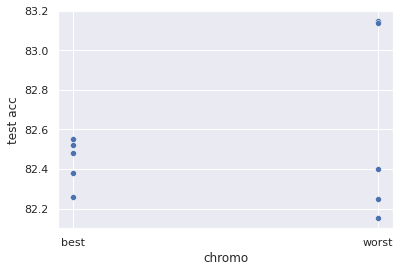

In [16]:
sns.scatterplot(data=combine, y="test acc", x="chromo")
plt.show()